In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7.0, 4.5)
plt.rcParams['font.size'] = 9
#plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

In [2]:
raw_data = pd.read_csv("data/Indicators.csv")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 302.1+ MB


In [10]:
raw_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.000000


In [11]:
chosen_indicators = ['NY.GDP.MKTP.CD' ]
df_indicators = raw_data[raw_data.IndicatorCode.isin(chosen_indicators)]

In [12]:
df_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
94,Caribbean small states,CSS,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,1.917148e+09
262,East Asia & Pacific (all income levels),EAS,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,1.530501e+11
375,East Asia & Pacific (developing only),EAP,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,8.007443e+10
516,Euro area,EMU,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,2.453780e+11
622,Europe & Central Asia (all income levels),ECS,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,4.326820e+11


In [13]:
df_India = df_indicators[df_indicators.CountryName == 'India']

In [14]:
df_India.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11614,India,IND,GDP at market prices (current US$),NY.GDP.MKTP.CD,1960,3.767927e+10
36552,India,IND,GDP at market prices (current US$),NY.GDP.MKTP.CD,1961,3.992045e+10
64092,India,IND,GDP at market prices (current US$),NY.GDP.MKTP.CD,1962,4.290086e+10
92537,India,IND,GDP at market prices (current US$),NY.GDP.MKTP.CD,1963,4.927110e+10
121334,India,IND,GDP at market prices (current US$),NY.GDP.MKTP.CD,1964,5.747078e+10


In [23]:
# This function is for plotting the country data. 
# Inputs are : 
# indicator = the Indicator that we are interested in
# countryNameArray = list of Countries that we wanted to Check
# compareCountry = The country against which we want to compare the above countries

def plot_indicator(indicator, countryNameArray, compareCountry = None):
    plt.figure(figsize=(25,20))
    if compareCountry == None:
        for index, names in enumerate(countryNameArray):
            df_countryData = df_indicators[df_indicators.CountryName == names]
            ds_countryData = df_countryData[['IndicatorName','Year','Value']][df_countryData['IndicatorCode']==indicator]
            try:
                title = (ds_countryData['IndicatorName'] + " Of " + names).iloc[0]
            except:
                title = "None"

            xcountry = ds_countryData['Year'].values
            ycountry = ds_countryData['Value'].values

            plt.subplot(3, 3, index + 1)
            plt.plot(xcountry,ycountry,label=names)
            plt.title(title)
            plt.legend(loc=2)
    else:
        df_mainCountry = df_indicators[df_indicators.CountryName == compareCountry]
        ds_mainCountry = df_mainCountry[['IndicatorName','Year','Value']][df_mainCountry['IndicatorCode']==indicator]
        yCompareCountry = ds_mainCountry['Value'].values
        xCompareCountry = ds_mainCountry['Year'].values
        
        for index, names in enumerate(countryNameArray):
            df_countryData = df_indicators[df_indicators.CountryName == names]
            ds_countryData = df_countryData[['IndicatorName','Year','Value']][df_countryData['IndicatorCode']==indicator]
            try:
                title = (ds_countryData['IndicatorName'] + " Of " + names + " Vs " + compareCountry).iloc[0]
            except:
                title = "None"

            xcountry = ds_countryData['Year'].values
            ycountry = ds_countryData['Value'].values
            
            plt.subplot(3, 3, index + 1)
            plt.plot(xCompareCountry, yCompareCountry,marker = 'o', label = compareCountry)
            plt.plot(xcountry,ycountry,marker = 'o',label=names)
            plt.title(title)
            plt.legend(loc=2)

In [24]:
# Making a generalized function to plot any Country
def country_plot(countryNameArray, compareCountry=None):
    plot_indicator(chosen_indicators[0], countryNameArray, compareCountry)

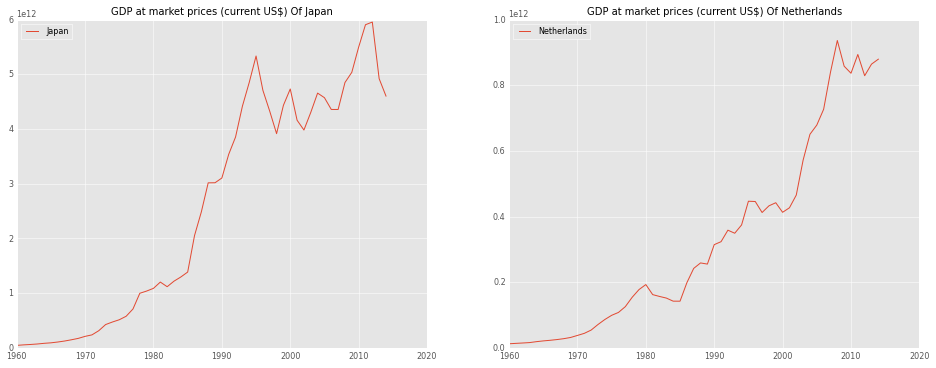

In [25]:
countryNameArray = ["Japan", "Netherlands"]
country_plot(countryNameArray)

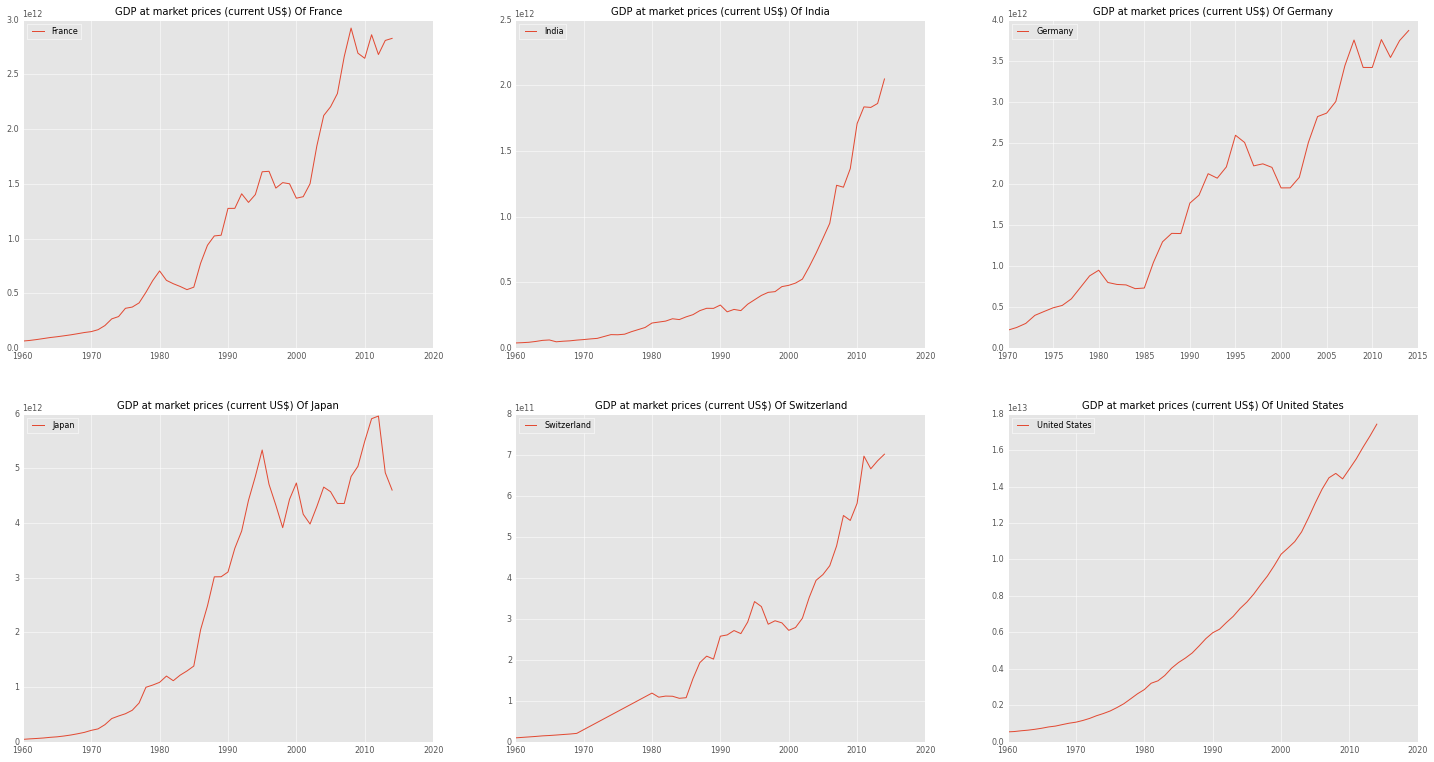

In [26]:
# Specify the countries here
countryNameArray = ["France", "India", "Germany", "Japan","Switzerland", "United States"]
country_plot(countryNameArray, compareCountry=None)

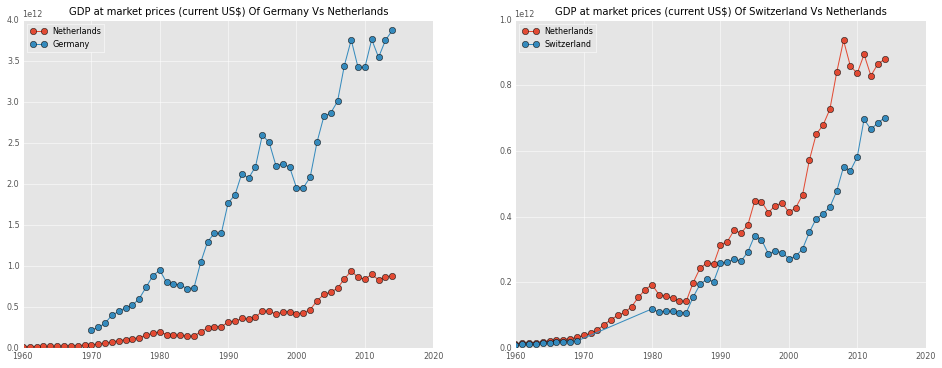

In [29]:
# Specify the countries here
countryNameArray = [ "Germany","Switzerland"]
compareCountry = "Netherlands"
country_plot(countryNameArray, compareCountry)

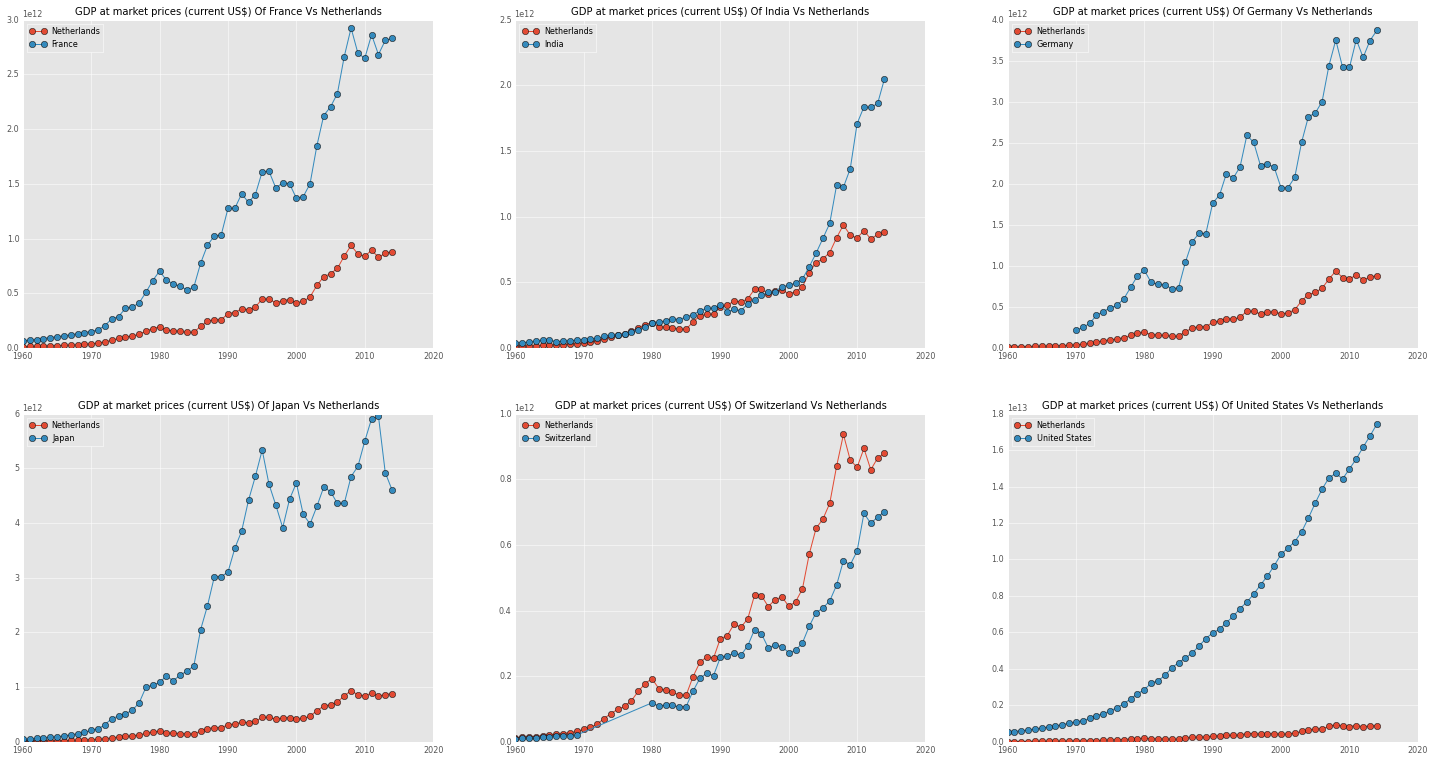

In [28]:
# Specify the countries here
countryNameArray = ["France", "India", "Germany", "Japan","Switzerland", "United States"]
compareCountry = "Netherlands"
country_plot(countryNameArray, compareCountry)